# Desafio

**Telecom X - Análise de Evasão de Clientes**

---


Fui contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Meu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da análise, os demais colegas da equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

#📌 Extracão

In [1]:
import pandas as pd

In [2]:
dados = pd.read_json('/content/TelecomX_Data.json')
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

### Normalização de dados aninhados

Vamos usar `pd.json_normalize` para expandir as colunas que contêm dicionários aninhados em novas colunas no DataFrame principal. Isso tornará os dados mais fáceis de analisar e manipular.

In [3]:
# Normalizando a coluna 'customer'
df_customer = pd.json_normalize(dados['customer'])
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [4]:
df_phone = pd.json_normalize(dados['phone'])
df_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [5]:
df_internet = pd.json_normalize(dados['internet'])
df_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [6]:
df_account = pd.json_normalize(dados['account'])
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


### Combinando os dados normalizados

Agora, vamos juntar todas as colunas normalizadas com as colunas originais `customerID` e `Churn` para formar um único DataFrame.

In [7]:
# Combinando as partes normalizadas com as colunas originais
dados_normalizados = pd.concat([
    dados[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Exibindo as primeiras linhas do DataFrame normalizado
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
colunas_para_renomear = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}

dados_normalizados = dados_normalizados.rename(columns=colunas_para_renomear)

print("Colunas renomeadas com sucesso!")
dados_normalizados.head()

Colunas renomeadas com sucesso!


,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

## Removendo campos vazios da coluna Churn


In [11]:
print(f"Shape do DataFrame antes da exclusão de dados vazios: {dados_normalizados.shape}")
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != '']
print(f"Shape do DataFrame após a exclusão de dados vazios: {dados_normalizados.shape}")

Shape do DataFrame antes da exclusão de dados vazios: (7267, 21)
Shape do DataFrame após a exclusão de dados vazios: (7043, 21)


In [12]:
dados_normalizados.head(10)

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [13]:
binary_map_churn = {'Yes': 1, 'No': 0}
dados_normalizados.loc[:, 'Churn'] = dados_normalizados['Churn'].map(binary_map_churn).fillna(0).astype('int64')

print("Verifying 'Churn' column after transformation:")
dados_normalizados['Churn'].head()
dados_normalizados['Churn'].dtype
dados_normalizados['Churn'].unique()

Verifying 'Churn' column after transformation:


array([0, 1], dtype=object)

In [14]:
# Verificando valores nulos
dados_normalizados.isnull().sum()

,0
ID_Cliente,0
Churn,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Servico_Internet,0


In [15]:
dados_normalizados.head(20)

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,0,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,0,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,0,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,0,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,0,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


### Transformando tipos de dados

Primeiro, vamos converter a coluna `Charges.Total` para um tipo numérico. Como ela foi importada como 'object' e pode conter valores não numéricos (como strings vazias para clientes novos), usaremos `pd.to_numeric` com `errors='coerce'` para converter esses valores em `NaN` (Not a Number), e em seguida preencheremos os `NaN` com zero, assumindo que significam 0 gastos. O dicionário de dados já informa que o `Charges.Total` é o total gasto pelo cliente.

In [16]:
# Convertendo 'Charges.Total' para numérico
dados_normalizados['Cobranca_Total'] = pd.to_numeric(dados_normalizados['Cobranca_Total'], errors='coerce')

# Preenchendo valores NaN (resultantes de 'coerce') com 0
dados_normalizados['Cobranca_Total'] = dados_normalizados['Cobranca_Total'].fillna(0)


dados_normalizados['Cobranca_Mensal'] = pd.to_numeric(dados_normalizados['Cobranca_Mensal'])
dados_normalizados['Cobranca_Mensal'] = dados_normalizados['Cobranca_Mensal'].fillna(0)


dados_normalizados.dtypes

,0
ID_Cliente,object
Churn,object
Genero,object
Idoso,int64
Parceiro,object
Dependentes,object
Meses_Contrato,int64
Servico_Telefone,object
Multiplas_Linhas,object
Servico_Internet,object


In [17]:
dados_normalizados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [18]:
dados_normalizados['Churn'] = dados_normalizados['Churn'].astype('int64')
dados_normalizados.dtypes

,0
ID_Cliente,object
Churn,int64
Genero,object
Idoso,int64
Parceiro,object
Dependentes,object
Meses_Contrato,int64
Servico_Telefone,object
Multiplas_Linhas,object
Servico_Internet,object


In [19]:
dados_normalizados[['Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']].head(50)

,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes
0,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,Yes,Yes,DSL,No,No,No,No,No,Yes
2,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
5,Yes,No,DSL,No,No,No,Yes,Yes,Yes
6,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
7,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No
8,Yes,No,DSL,Yes,No,No,No,No,No
9,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes


In [20]:

dados_normalizados['Churn'].unique() #'Yes', 'No', ''
#dados_normalizados['gender'].unique() #'Female', 'Male'
#dados_normalizados['SeniorCitizen'].unique() #0,1
#dados_normalizados['Partner'].unique() #'Yes', 'No'
#dados_normalizados['Dependents'].unique() #'Yes', 'No'
#dados_normalizados['tenure'].unique() ###
#dados_normalizados['PhoneService'].unique() #'Yes', 'No'
#dados_normalizados['MultipleLines'].unique() #'No', 'Yes', 'No phone service'
#dados_normalizados['InternetService'].unique() #'DSL', 'Fiber optic', 'No'
#dados_normalizados['OnlineSecurity'].unique() #'No', 'Yes', 'No internet service'
#dados_normalizados['OnlineBackup'].unique() #'Yes', 'No', 'No internet service'
#dados_normalizados['DeviceProtection'].unique() #'No', 'Yes', 'No internet service'
#dados_normalizados['TechSupport'].unique() #'No', 'Yes', 'No internet service'
#dados_normalizados['StreamingTV'].unique() #'No', 'Yes', 'No internet service'
#dados_normalizados['StreamingMovies'].unique() #'No', 'Yes', 'No internet service'
#dados_normalizados['Contract'].unique()  #'One year', 'Month-to-month', 'Two year'
#dados_normalizados['PaperlessBilling'].unique() #Yes/No
#dados_normalizados['PaymentMethod'].unique()  #'Mailed check', 'Electronic check', 'Credit card (automatic)','Bank transfer (automatic)'


array([0, 1])

In [21]:
# Mapeamento para 'Yes'/'No' e para 'No internet service'/'No phone service' como 0
full_binary_map = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}

# Colunas que podem conter 'No phone service' ou 'No internet service'
columns_with_special_binary = [
    'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes'
]




for col in columns_with_special_binary:
    dados_normalizados[col] = dados_normalizados[col].map(full_binary_map).astype('int64')

print("Tipos de dados após mapeamento binário das colunas restantes para int64:")
display(dados_normalizados[columns_with_special_binary].dtypes)

print("Verificando as primeiras linhas e valores nulos após a transformação:")
display(dados_normalizados[columns_with_special_binary].head())
display(dados_normalizados[columns_with_special_binary].isnull().sum())


Tipos de dados após mapeamento binário das colunas restantes para int64:


,0
Multiplas_Linhas,int64
Seguranca_Online,int64
Backup_Online,int64
Protecao_Dispositivo,int64
Suporte_Tecnico,int64
Streaming_TV,int64
Streaming_Filmes,int64


Verificando as primeiras linhas e valores nulos após a transformação:


,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes
0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1
4,0,0,0,0,1,1,0


,0
Multiplas_Linhas,0
Seguranca_Online,0
Backup_Online,0
Protecao_Dispositivo,0
Suporte_Tecnico,0
Streaming_TV,0
Streaming_Filmes,0


In [22]:
dados_normalizados.dtypes

,0
ID_Cliente,object
Churn,int64
Genero,object
Idoso,int64
Parceiro,object
Dependentes,object
Meses_Contrato,int64
Servico_Telefone,object
Multiplas_Linhas,int64
Servico_Internet,object


Agora, vamos converter as colunas binárias ('Yes'/'No') para um formato numérico (0 e 1) ou booleano, o que é mais adequado para modelos e análises quantitativas. Para as colunas que incluem 'No internet service' ou 'No phone service', manteremos como tipo 'category' do pandas.

In [23]:
binary_map = {'Yes': 1, 'No': 0}

# Colunas binárias 'Yes'/'No' que não possuem valores como 'No internet service'
columns_to_map_pure_binary = [
    'Parceiro', 'Dependentes', 'Servico_Telefone', 'Fatura_Online'
]

for col in columns_to_map_pure_binary:
    dados_normalizados[col] = dados_normalizados[col].map(binary_map).astype('int64')

# Coluna 'gender' é binária também, mas com 'Male'/'Female'
dados_normalizados['Genero'] = dados_normalizados['Genero'].map({'Female': 0, 'Male': 1}).astype('int64')

print("Tipos de dados após mapeamento binário:")
display(dados_normalizados[columns_to_map_pure_binary + ['Genero']].dtypes)


Tipos de dados após mapeamento binário:


,0
Parceiro,int64
Dependentes,int64
Servico_Telefone,int64
Fatura_Online,int64
Genero,int64


In [24]:
dados_normalizados.dtypes

,0
ID_Cliente,object
Churn,int64
Genero,int64
Idoso,int64
Parceiro,int64
Dependentes,int64
Meses_Contrato,int64
Servico_Telefone,int64
Multiplas_Linhas,int64
Servico_Internet,object


In [25]:
dados_normalizados.describe()

,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Online,Cobranca_Mensal,Cobranca_Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [26]:
dados_normalizados.head(50)

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
5,0013-MHZWF,0,0,0,0,1,9,1,0,DSL,...,0,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45
6,0013-SMEOE,0,0,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,0,1,0,1,0,63,1,1,Fiber optic,...,0,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,0,0,1,0,0,7,1,0,DSL,...,0,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35
9,0016-QLJIS,0,0,0,1,1,65,1,1,DSL,...,1,1,1,1,1,Two year,1,Mailed check,90.45,5957.90


#📊 Carga e análise

## Verificar valores ausentes e duplicados

Confirmando a ausência de valores nulos após as transformações recentes e identificar qualquer linha duplicada no DataFrame para garantir a integridade dos dados.


In [27]:
print("Valores nulos por coluna:")
display(dados_normalizados.isnull().sum())

print("\nNúmero de linhas duplicadas:")
display(dados_normalizados.duplicated().sum())

Valores nulos por coluna:


,0
ID_Cliente,0
Churn,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Servico_Internet,0



Número de linhas duplicadas:


np.int64(0)

## Analisar e padronizar colunas categóricas restantes

Analisando os valores únicos nas colunas 'Servico_Internet', 'Contrato' e 'Metodo_Pagamento' para detectar e corrigir possíveis inconsistências ou erros de formatação, preparando-as para codificação.


In [28]:
print("Unique values for 'Servico_Internet':")
display(dados_normalizados['Servico_Internet'].unique())

print("\nUnique values for 'Contrato':")
display(dados_normalizados['Contrato'].unique())

print("\nUnique values for 'Metodo_Pagamento':")
display(dados_normalizados['Metodo_Pagamento'].unique())

Unique values for 'Servico_Internet':


array(['DSL', 'Fiber optic', 'No'], dtype=object)


Unique values for 'Contrato':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)


Unique values for 'Metodo_Pagamento':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Com base nos valores únicos identificados na etapa anterior, aplicarei agora a codificação One-Hot às colunas categóricas 'Servico_Internet', 'Contrato' e 'Metodo_Pagamento' para convertê-las em um formato numérico adequado para análise. Após a codificação, verificarei os tipos de dados de todas as colunas para garantir a consistência.



In [ ]:
dados_normalizados = pd.get_dummies(dados_normalizados, columns=['Servico_Internet', 'Contrato', 'Metodo_Pagamento'], dtype=int)

print("DataFrame após One-Hot Encoding:")
display(dados_normalizados.head())

print("Data types após One-Hot Encoding:")
display(dados_normalizados.dtypes)

In [32]:
dados_normalizados.head(50)

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,...,Servico_Internet_DSL,Servico_Internet_Fiber optic,Servico_Internet_No,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_Pagamento_Bank transfer (automatic),Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5,0013-MHZWF,0,0,0,0,1,9,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6,0013-SMEOE,0,0,1,1,0,71,1,0,1,...,0,1,0,0,0,1,1,0,0,0
7,0014-BMAQU,0,1,0,1,0,63,1,1,1,...,0,1,0,0,0,1,0,1,0,0
8,0015-UOCOJ,0,0,1,0,0,7,1,0,1,...,1,0,0,1,0,0,0,0,1,0
9,0016-QLJIS,0,0,0,1,1,65,1,1,1,...,1,0,0,0,0,1,0,0,0,1


## Análise de Churn por Cobrança Mensal e Cobrança Total (Gráfico de Dispersão)


Gráfico de dispersão para comparar `Cobranca_Mensal` e `Cobranca_Total`, diferenciando o churn, e identificar padrões visuais.

Um gráfico de dispersão é ideal para visualizar a relação entre duas variáveis contínuas, como `Cobranca_Mensal` e `Cobranca_Total`. Ao colorir os pontos pelo status de `Churn`, podemos observar se há agrupamentos de clientes que evadiram em determinadas faixas de cobrança, revelando insights sobre o comportamento de evasão em relação aos custos dos serviços.

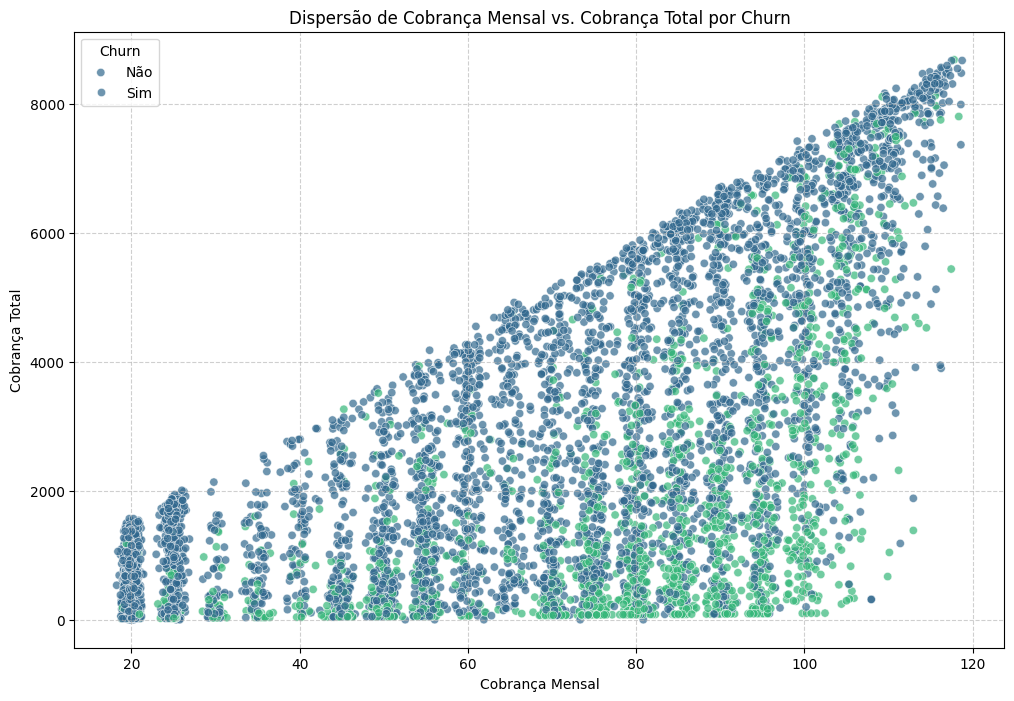

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dados_normalizados, x='Cobranca_Mensal', y='Cobranca_Total', hue='Churn', palette='viridis', alpha=0.7)
plt.title('Dispersão de Cobrança Mensal vs. Cobrança Total por Churn')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Cobrança Total')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Análise de Churn por Método de Pagamento (Gráfico de Barras Horizontal)

Gerando um gráfico de barras horizontal para visualizar a proporção de clientes que evadiram (Churn = 1) versus os que permaneceram (Churn = 0) para o método de pagamento 'Electronic check'.


Para visualizar a influência de um método de pagamento específico no churn, utilizarei um gráfico de barras horizontal. Este formato é ideal para comparar a proporção de churn entre as duas categorias (sim/não para o método de pagamento), especialmente quando queremos destacar a diferença nas taxas de evasão. O gráfico incluirá percentuais para uma interpretação clara e direta.

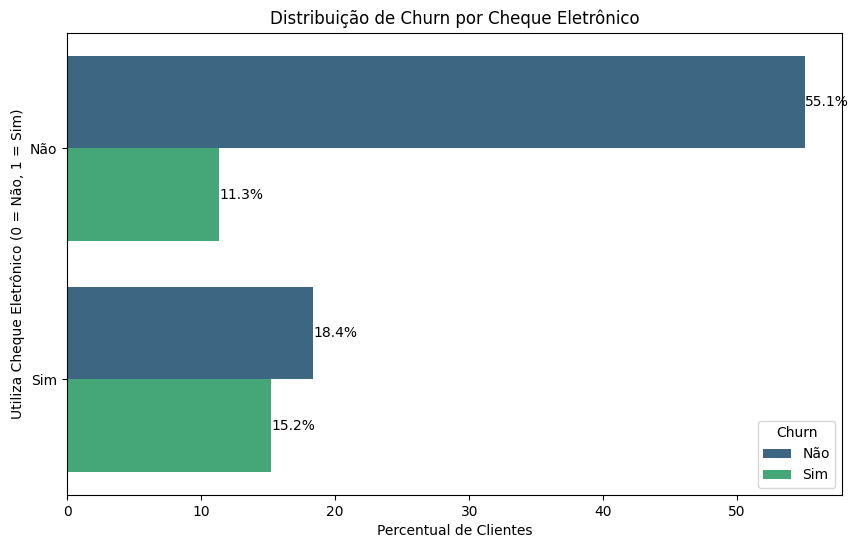

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dados_normalizados, y='Metodo_Pagamento_Electronic check', hue='Churn', palette='viridis', stat='percent', legend=False)

plt.title('Distribuição de Churn por Cheque Eletrônico')
plt.xlabel('Percentual de Clientes')
plt.ylabel('Utiliza Cheque Eletrônico (0 = Não, 1 = Sim)')
plt.yticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])

# Adicionar os percentuais nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

## Análise da Proporção de Churn com Gráfico de Pizza

Gerarando um gráfico de pizza para visualizar a proporção de clientes que evadiram (Churn = 1) versus os que permaneceram (Churn = 0).

Para obter uma representação visual clara da distribuição de churn, utilizarei um gráfico de pizza. Este tipo de gráfico é ideal para mostrar a proporção de cada categoria (clientes que evadiram e clientes que não evadiram) em relação ao todo. O gráfico incluirá percentuais para facilitar a interpretação.

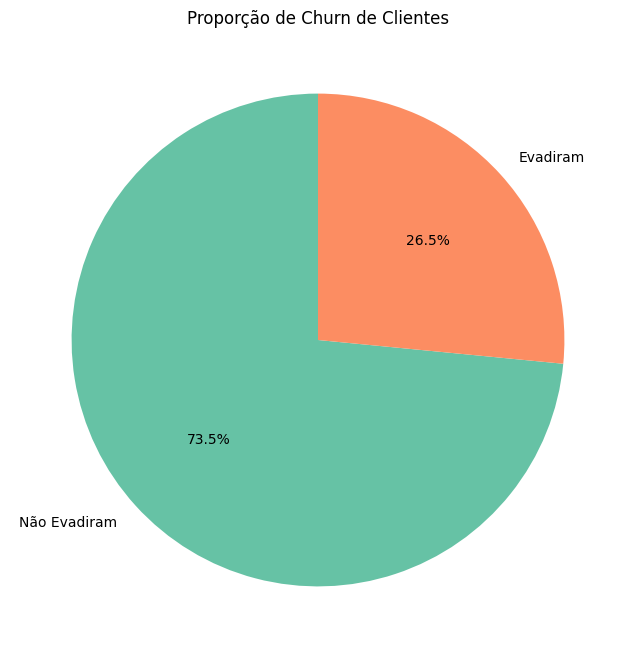

In [35]:
import matplotlib.pyplot as plt

churn_counts = dados_normalizados['Churn'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Não Evadiram', 'Evadiram'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Proporção de Churn de Clientes')
plt.show()


## Análise da Distribuição de Churn

Visualizando a proporção de clientes que evadiram (Churn 'Yes' = 1) versus os que permaneceram (Churn 'No' = 0) para entender a magnitude do problema.


In [36]:
print("Contagem de clientes por Churn:")
display(dados_normalizados['Churn'].value_counts())

Contagem de clientes por Churn:


,count
Churn,
0,5174
1,1869


Para visualizar a proporção de clientes que cancelaram e os que não cancelaram, criarei um gráfico de barras usando o seaborn.countplot. Isso fornecerá uma representação gráfica clara da distribuição de cancelamentos.



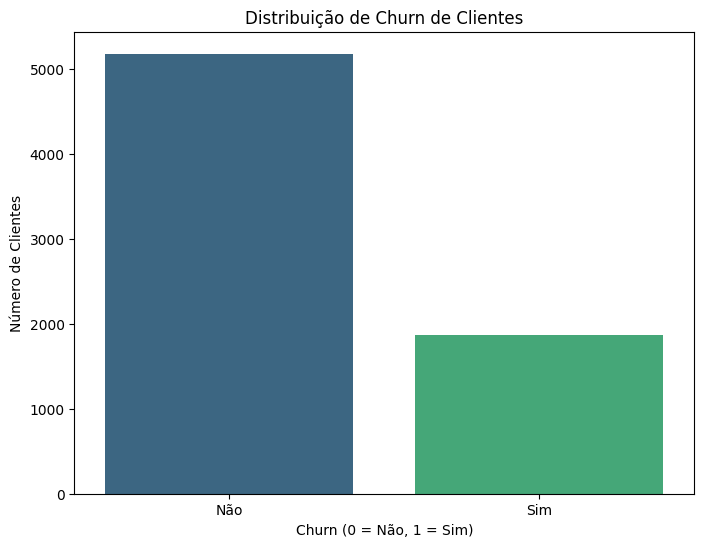

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=dados_normalizados, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribuição de Churn de Clientes')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.show()

## Churn por Gênero e Idoso

Explorarando a relação do churn com o gênero e a condição de ser idoso para verificar se há diferenças significativas entre esses grupos demográficos.


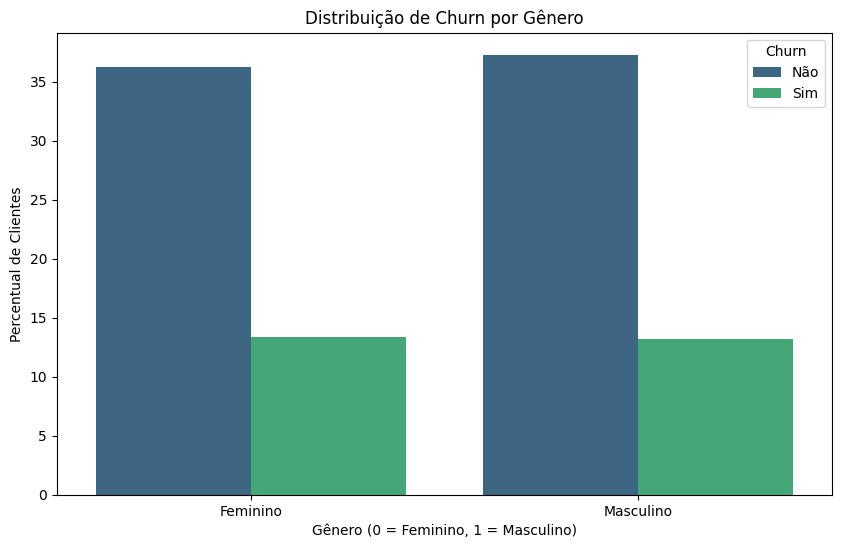

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Genero', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero (0 = Feminino, 1 = Masculino)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

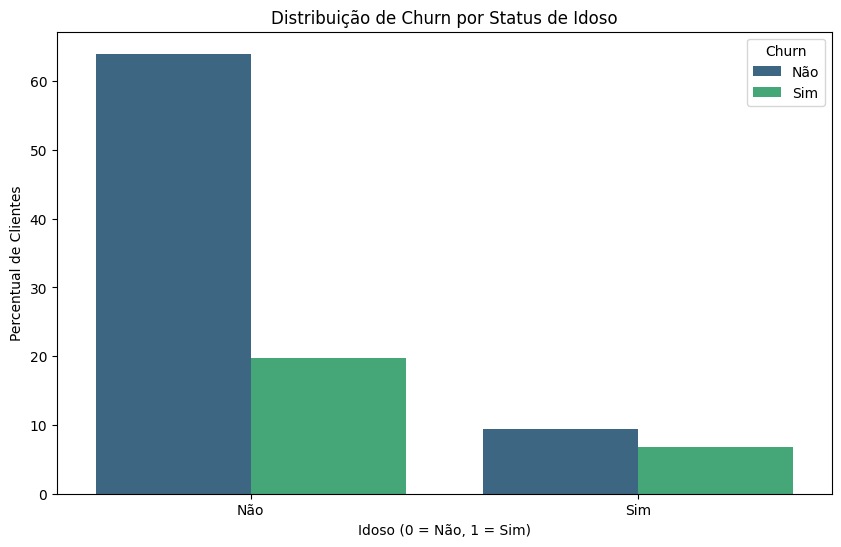

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Idoso', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Status de Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

## Churn por Parceiro e Dependentes


Analisar como a presença de parceiros ou dependentes influencia a taxa de churn dos clientes.


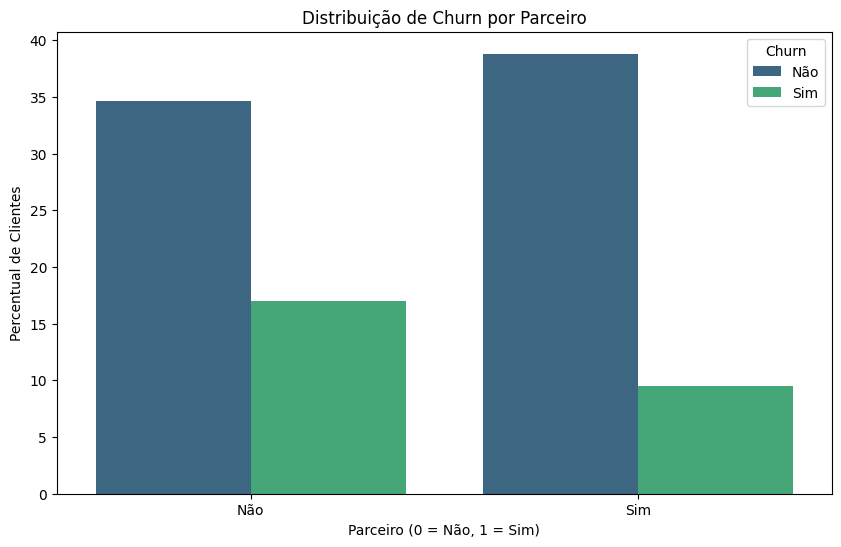

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Parceiro', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Parceiro')
plt.xlabel('Parceiro (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

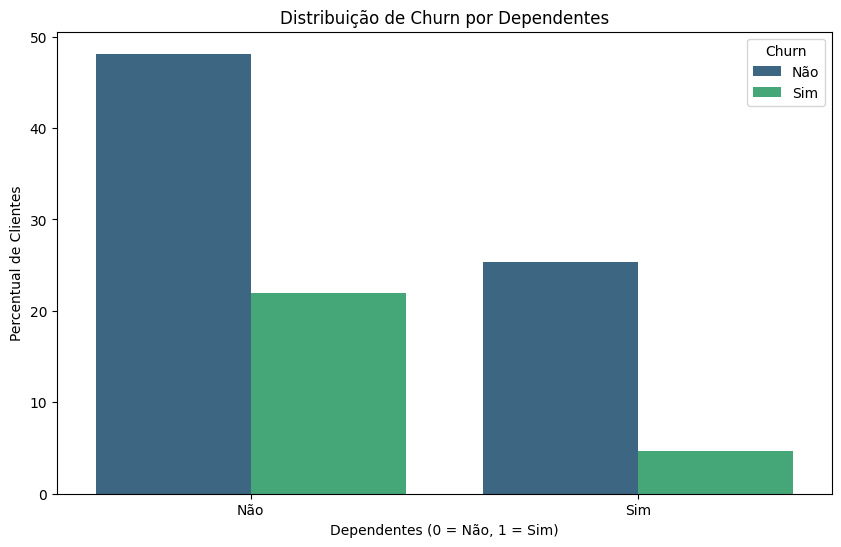

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Dependentes', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Dependentes')
plt.xlabel('Dependentes (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

## Churn por Tempo de Contrato (Tenure)


Visualizar a distribuição do tempo de contrato (Meses_Contrato) para clientes que evadiram e os que não, buscando padrões de evasão ao longo do tempo de serviço.


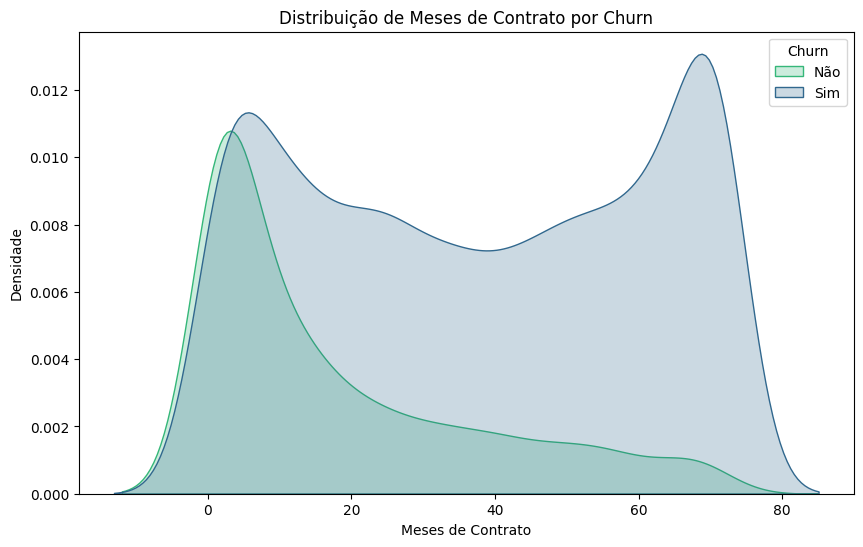

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=dados_normalizados, x='Meses_Contrato', hue='Churn', fill=True, palette='viridis')
plt.title('Distribuição de Meses de Contrato por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Densidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

## Churn por Serviços de Telefone e Internet


Investigando a influência dos serviços de telefone (Servico_Telefone, Multiplas_Linhas) na taxa de churn dos clientes.


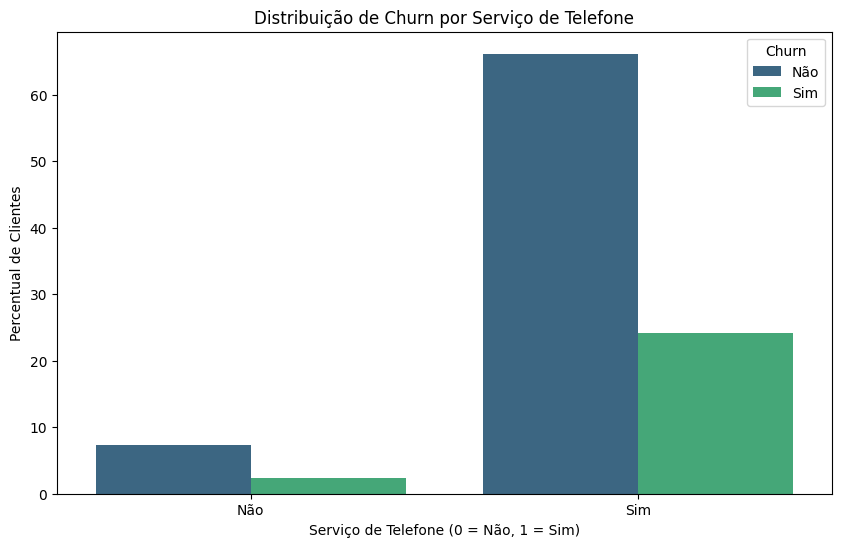

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Servico_Telefone', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Serviço de Telefone')
plt.xlabel('Serviço de Telefone (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

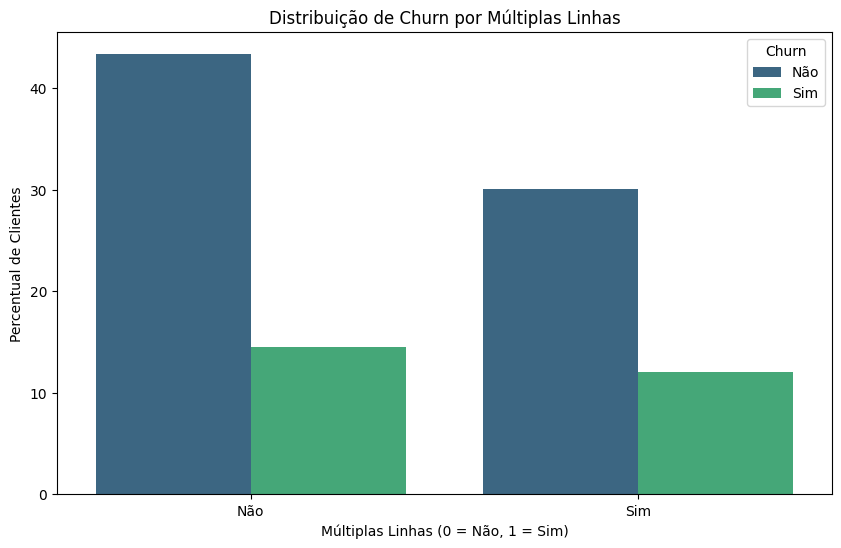

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Multiplas_Linhas', hue='Churn', palette='viridis', stat='percent')
plt.title('Distribuição de Churn por Múltiplas Linhas')
plt.xlabel('Múltiplas Linhas (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

## Churn por Serviços de Internet


Analisando a relação entre o Churn e os diferentes tipos de serviço de internet (Servico_Internet) e os serviços adicionais relacionados à internet, como segurança online (Seguranca_Online), backup online (Backup_Online), proteção de dispositivo (Protecao_Dispositivo), suporte técnico (Suporte_Tecnico), streaming de TV (Streaming_TV) e streaming de filmes (Streaming_Filmes).

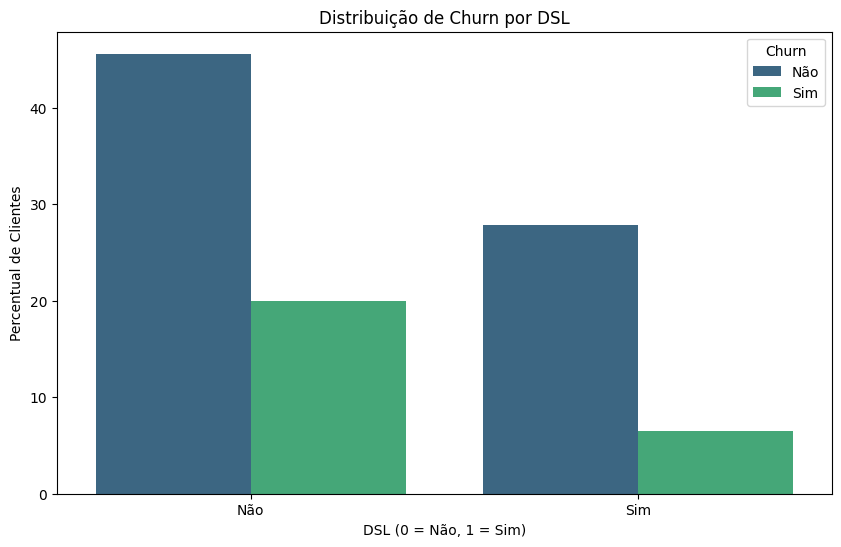

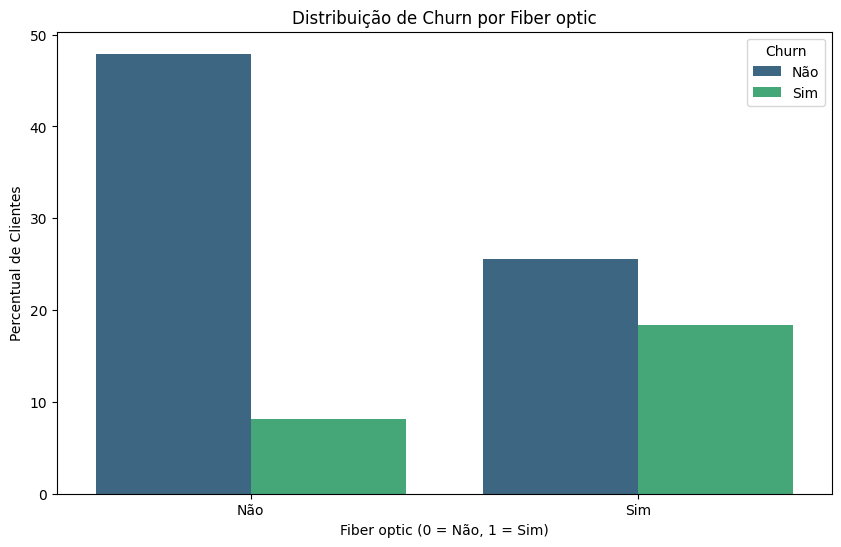

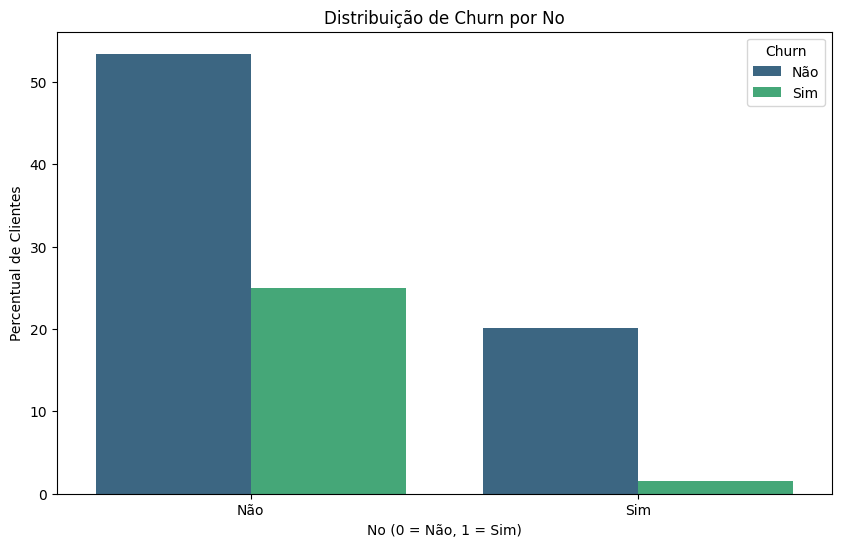

In [44]:
internet_service_columns = ['Servico_Internet_DSL', 'Servico_Internet_Fiber optic', 'Servico_Internet_No']

for col in internet_service_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados_normalizados, x=col, hue='Churn', palette='viridis', stat='percent', legend=False)
    plt.title(f'Distribuição de Churn por {col.replace("Servico_Internet_", "").replace("_", " ")}')
    plt.xlabel(f'{col.replace("Servico_Internet_", "").replace("_", " ")} (0 = Não, 1 = Sim)')
    plt.ylabel('Percentual de Clientes')
    plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.show()

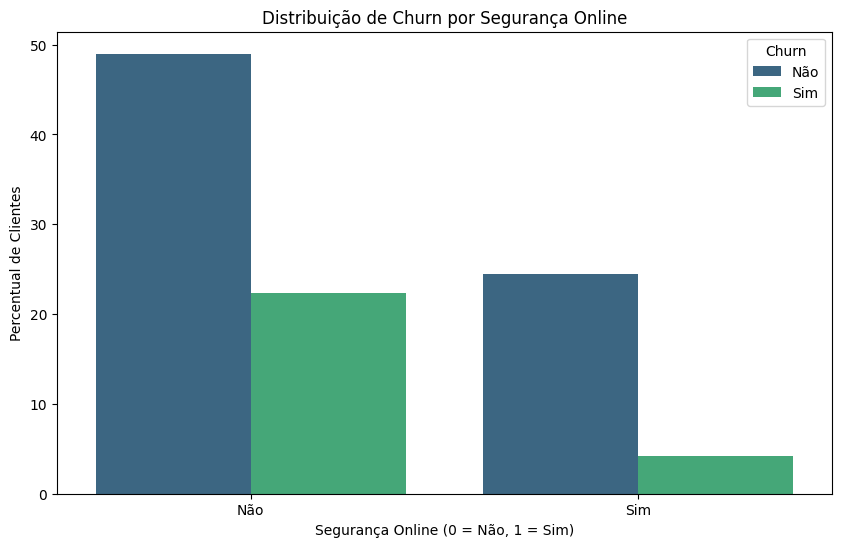

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Seguranca_Online', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Segurança Online')
plt.xlabel('Segurança Online (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

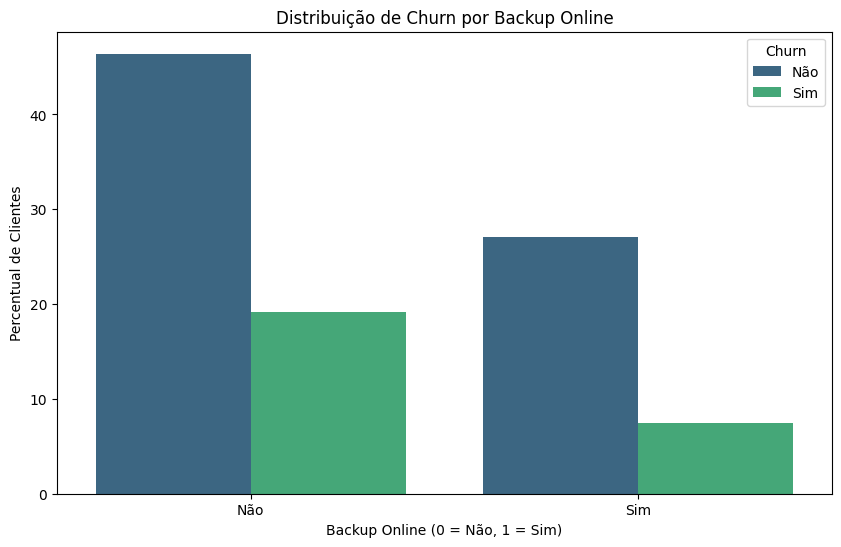

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Backup_Online', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Backup Online')
plt.xlabel('Backup Online (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

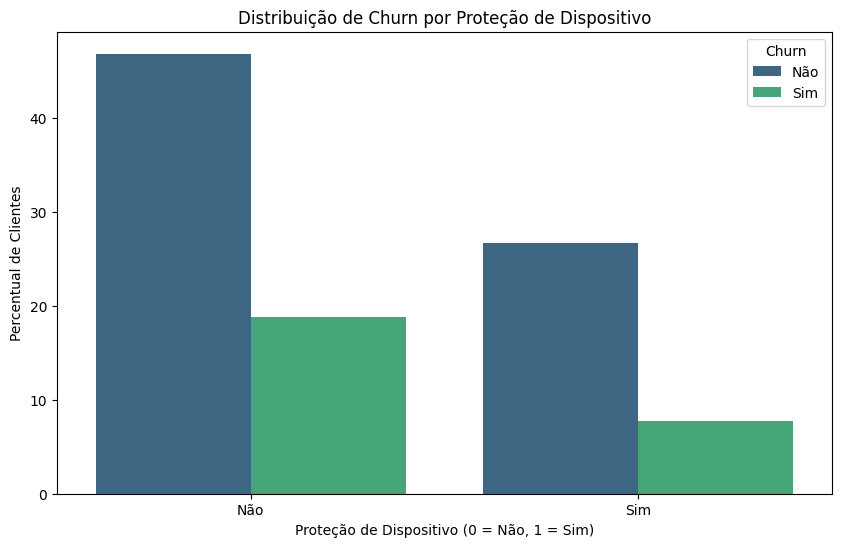

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Protecao_Dispositivo', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Proteção de Dispositivo')
plt.xlabel('Proteção de Dispositivo (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

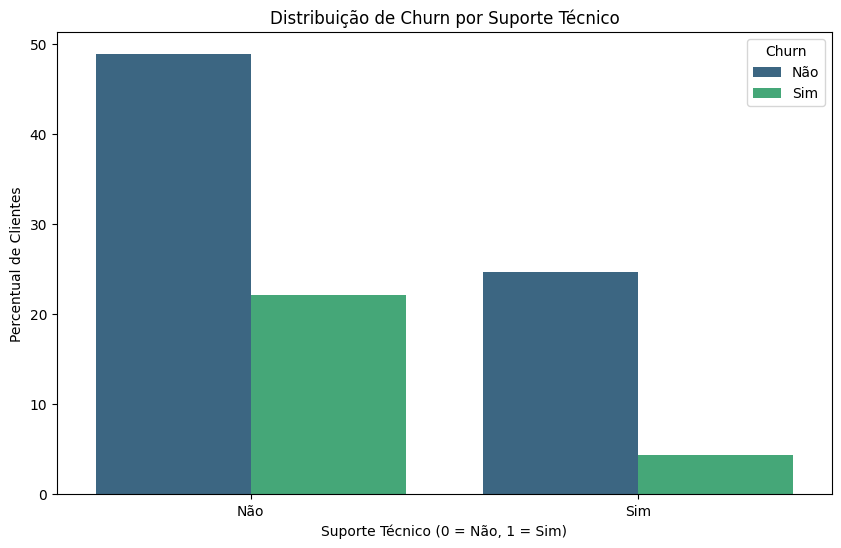

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Suporte_Tecnico', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Suporte Técnico')
plt.xlabel('Suporte Técnico (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

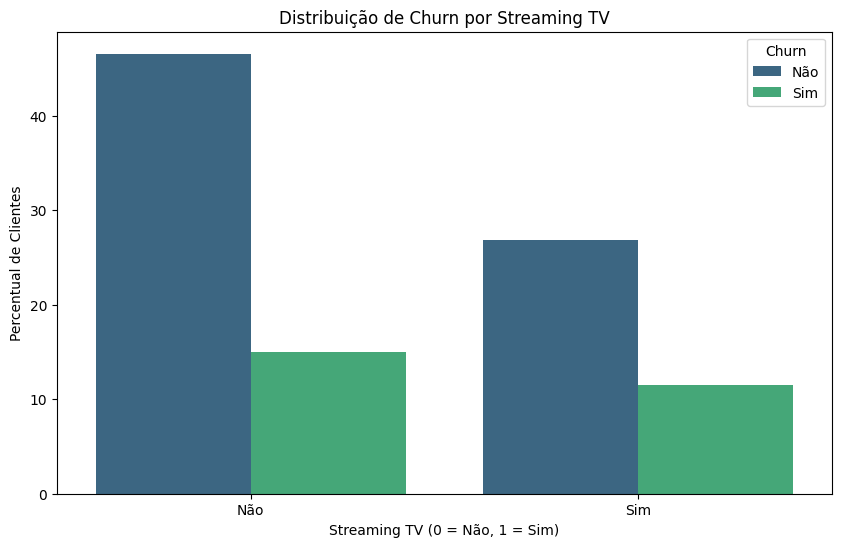

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Streaming_TV', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Streaming TV')
plt.xlabel('Streaming TV (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

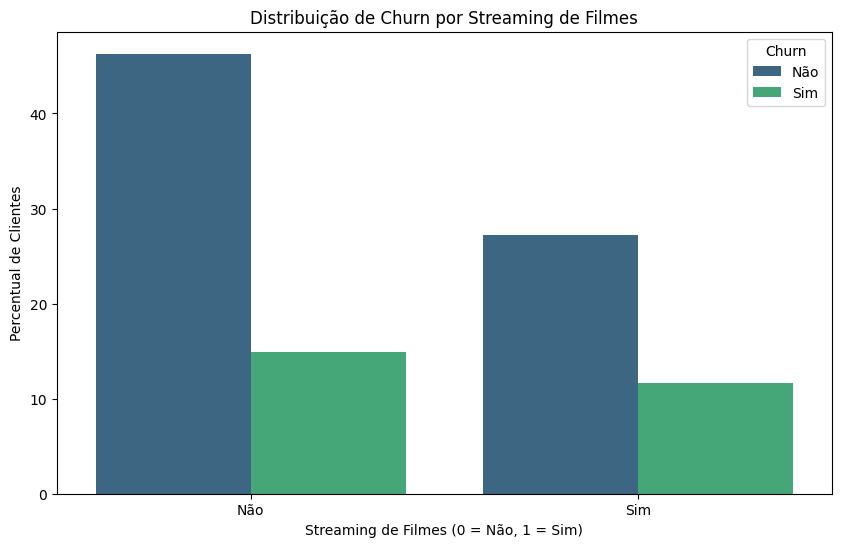

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Streaming_Filmes', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Streaming de Filmes')
plt.xlabel('Streaming de Filmes (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

## Churn por Contrato, Faturamento e Método de Pagamento


Analisar a relação entre o Churn e as características do contrato (Contrato), preferências de fatura (Fatura_Online) e métodos de pagamento (Metodo_Pagamento), para identificar padrões de evasão relacionados a essas políticas.

## Churn por Tipo de Contrato


Analisar como os diferentes tipos de contrato ('Month-to-month', 'One year', 'Two year') se relacionam com a evasão de clientes.


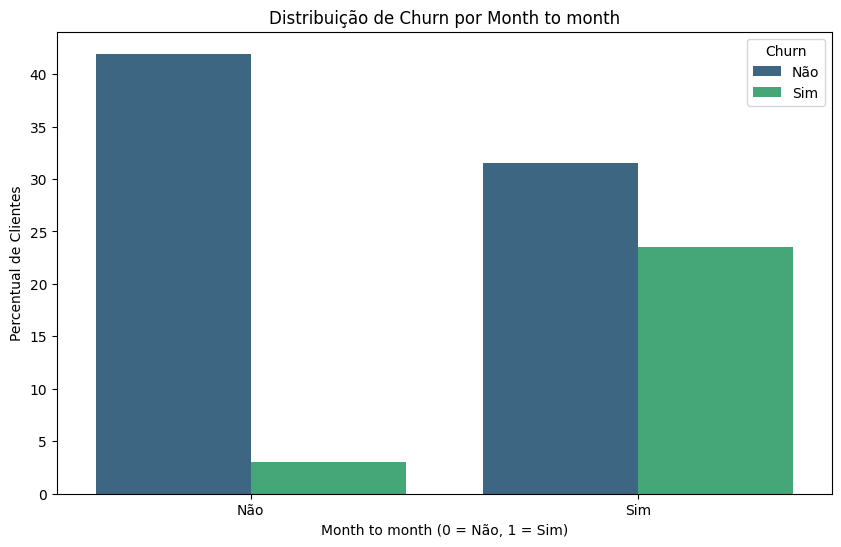

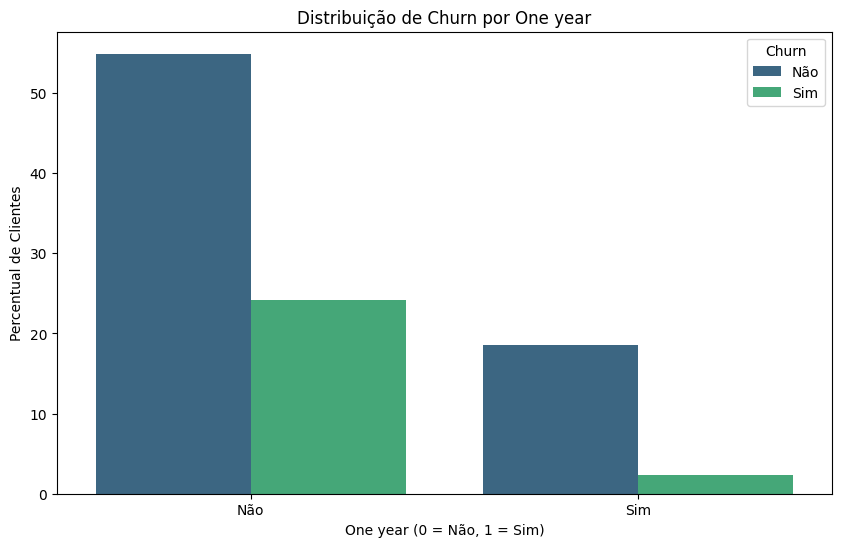

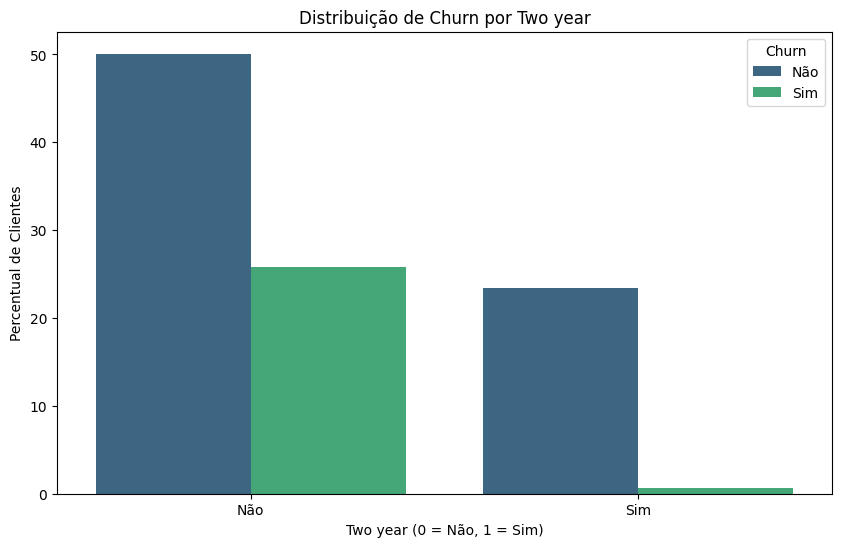

In [50]:
contract_columns = ['Contrato_Month-to-month', 'Contrato_One year', 'Contrato_Two year']

for col in contract_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados_normalizados, x=col, hue='Churn', palette='viridis', stat='percent', legend=False)
    plt.title(f'Distribuição de Churn por {col.replace("Contrato_", "").replace("-", " ")}')
    plt.xlabel(f'{col.replace("Contrato_", "").replace("-", " ")} (0 = Não, 1 = Sim)')
    plt.ylabel('Percentual de Clientes')
    plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.show()


Para analisar como as preferências de faturamento ('Fatura_Online') influenciam a taxa de cancelamento de clientes, criarei um gráfico de contagem mostrando a distribuição percentual de 'Churn' para cada categoria de 'Fatura_Online'. Isso destacará visualmente quaisquer diferenças nas taxas de cancelamento com base na preferência dos clientes por faturas eletrônicas.



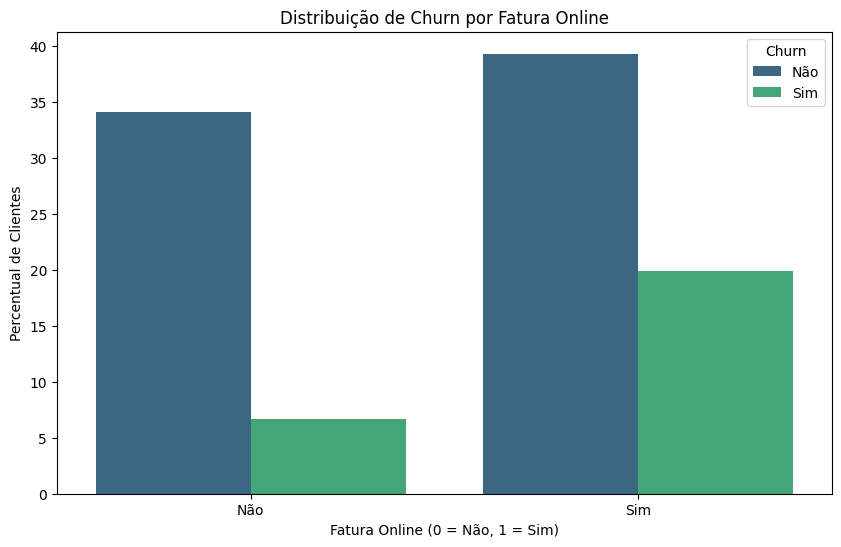

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_normalizados, x='Fatura_Online', hue='Churn', palette='viridis', stat='percent', legend=False)
plt.title('Distribuição de Churn por Fatura Online')
plt.xlabel('Fatura Online (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

Para analisar como diferentes métodos de pagamento influenciam a taxa de cancelamento de clientes, irei percorrer as colunas de métodos de pagamento codificadas em One-Hot e criar um gráfico de contagem para cada uma, visualizando a distribuição percentual da taxa de cancelamento para cada método de pagamento.


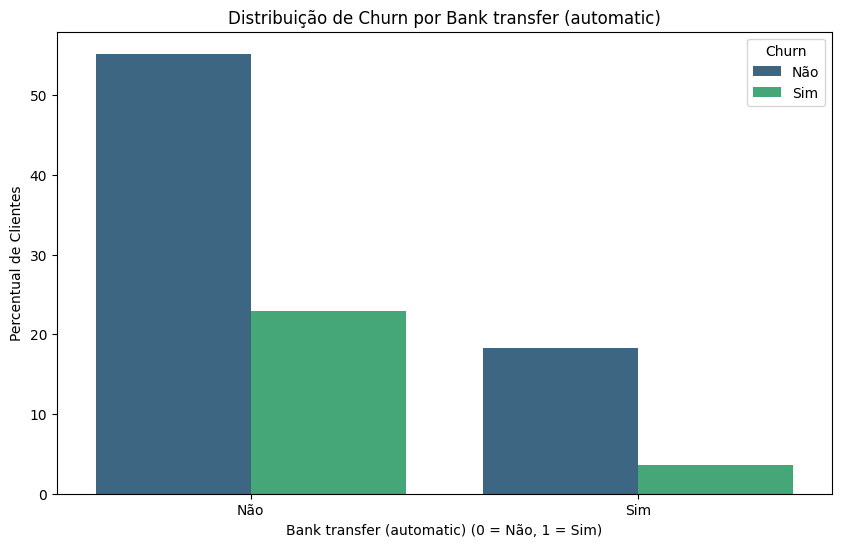

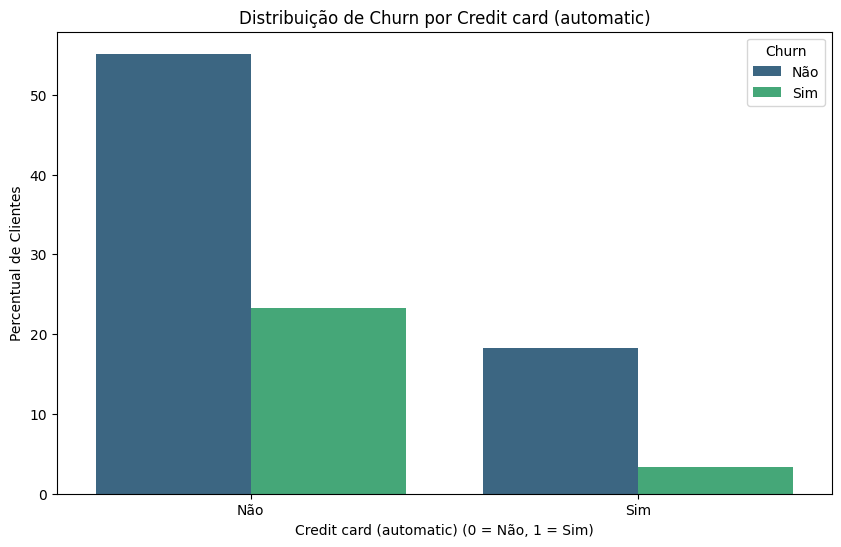

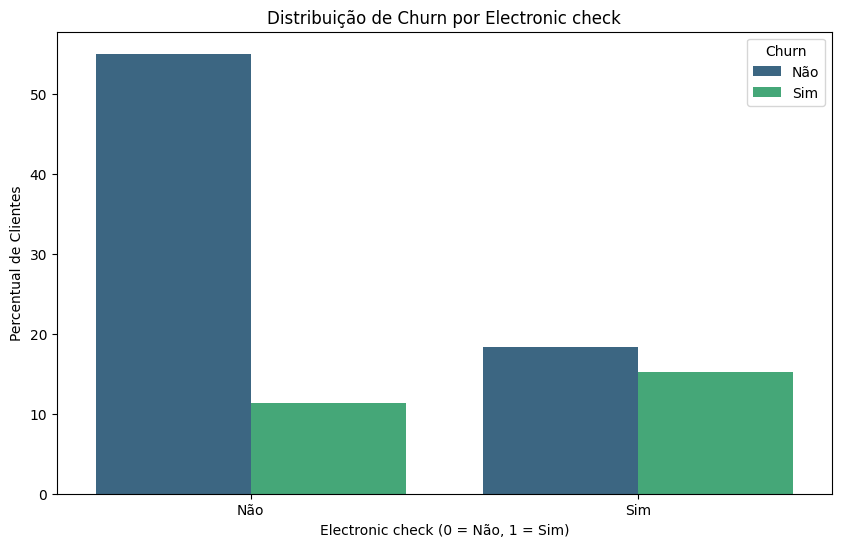

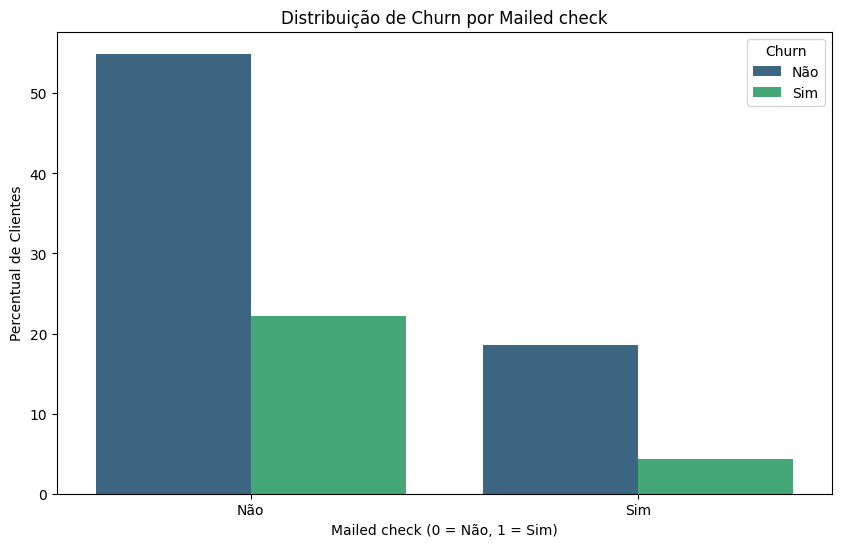

In [52]:
payment_method_columns = [
    'Metodo_Pagamento_Bank transfer (automatic)',
    'Metodo_Pagamento_Credit card (automatic)',
    'Metodo_Pagamento_Electronic check',
    'Metodo_Pagamento_Mailed check'
]

for col in payment_method_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados_normalizados, x=col, hue='Churn', palette='viridis', stat='percent', legend=False)
    plt.title(f'Distribuição de Churn por {col.replace("Metodo_Pagamento_", "").replace("_", " ")}')
    plt.xlabel(f'{col.replace("Metodo_Pagamento_", "").replace("_", " ")} (0 = Não, 1 = Sim)')
    plt.ylabel('Percentual de Clientes')
    plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.show()

## Churn por Cobrança Mensal e Cobrança Total


Comparar as distribuições de Cobranca_Mensal e Cobranca_Total entre clientes que evadiram e os que não, para identificar possíveis limiares ou faixas de custo que impactam a evasão.


## Gerando figura com múltiplos gráficos de análise de churn


Comparando as distribuições de `Cobranca_Mensal` e `Cobranca_Total` entre clientes que evadiram e os que não, para identificar possíveis limiares ou faixas de custo que impactam a evasão.


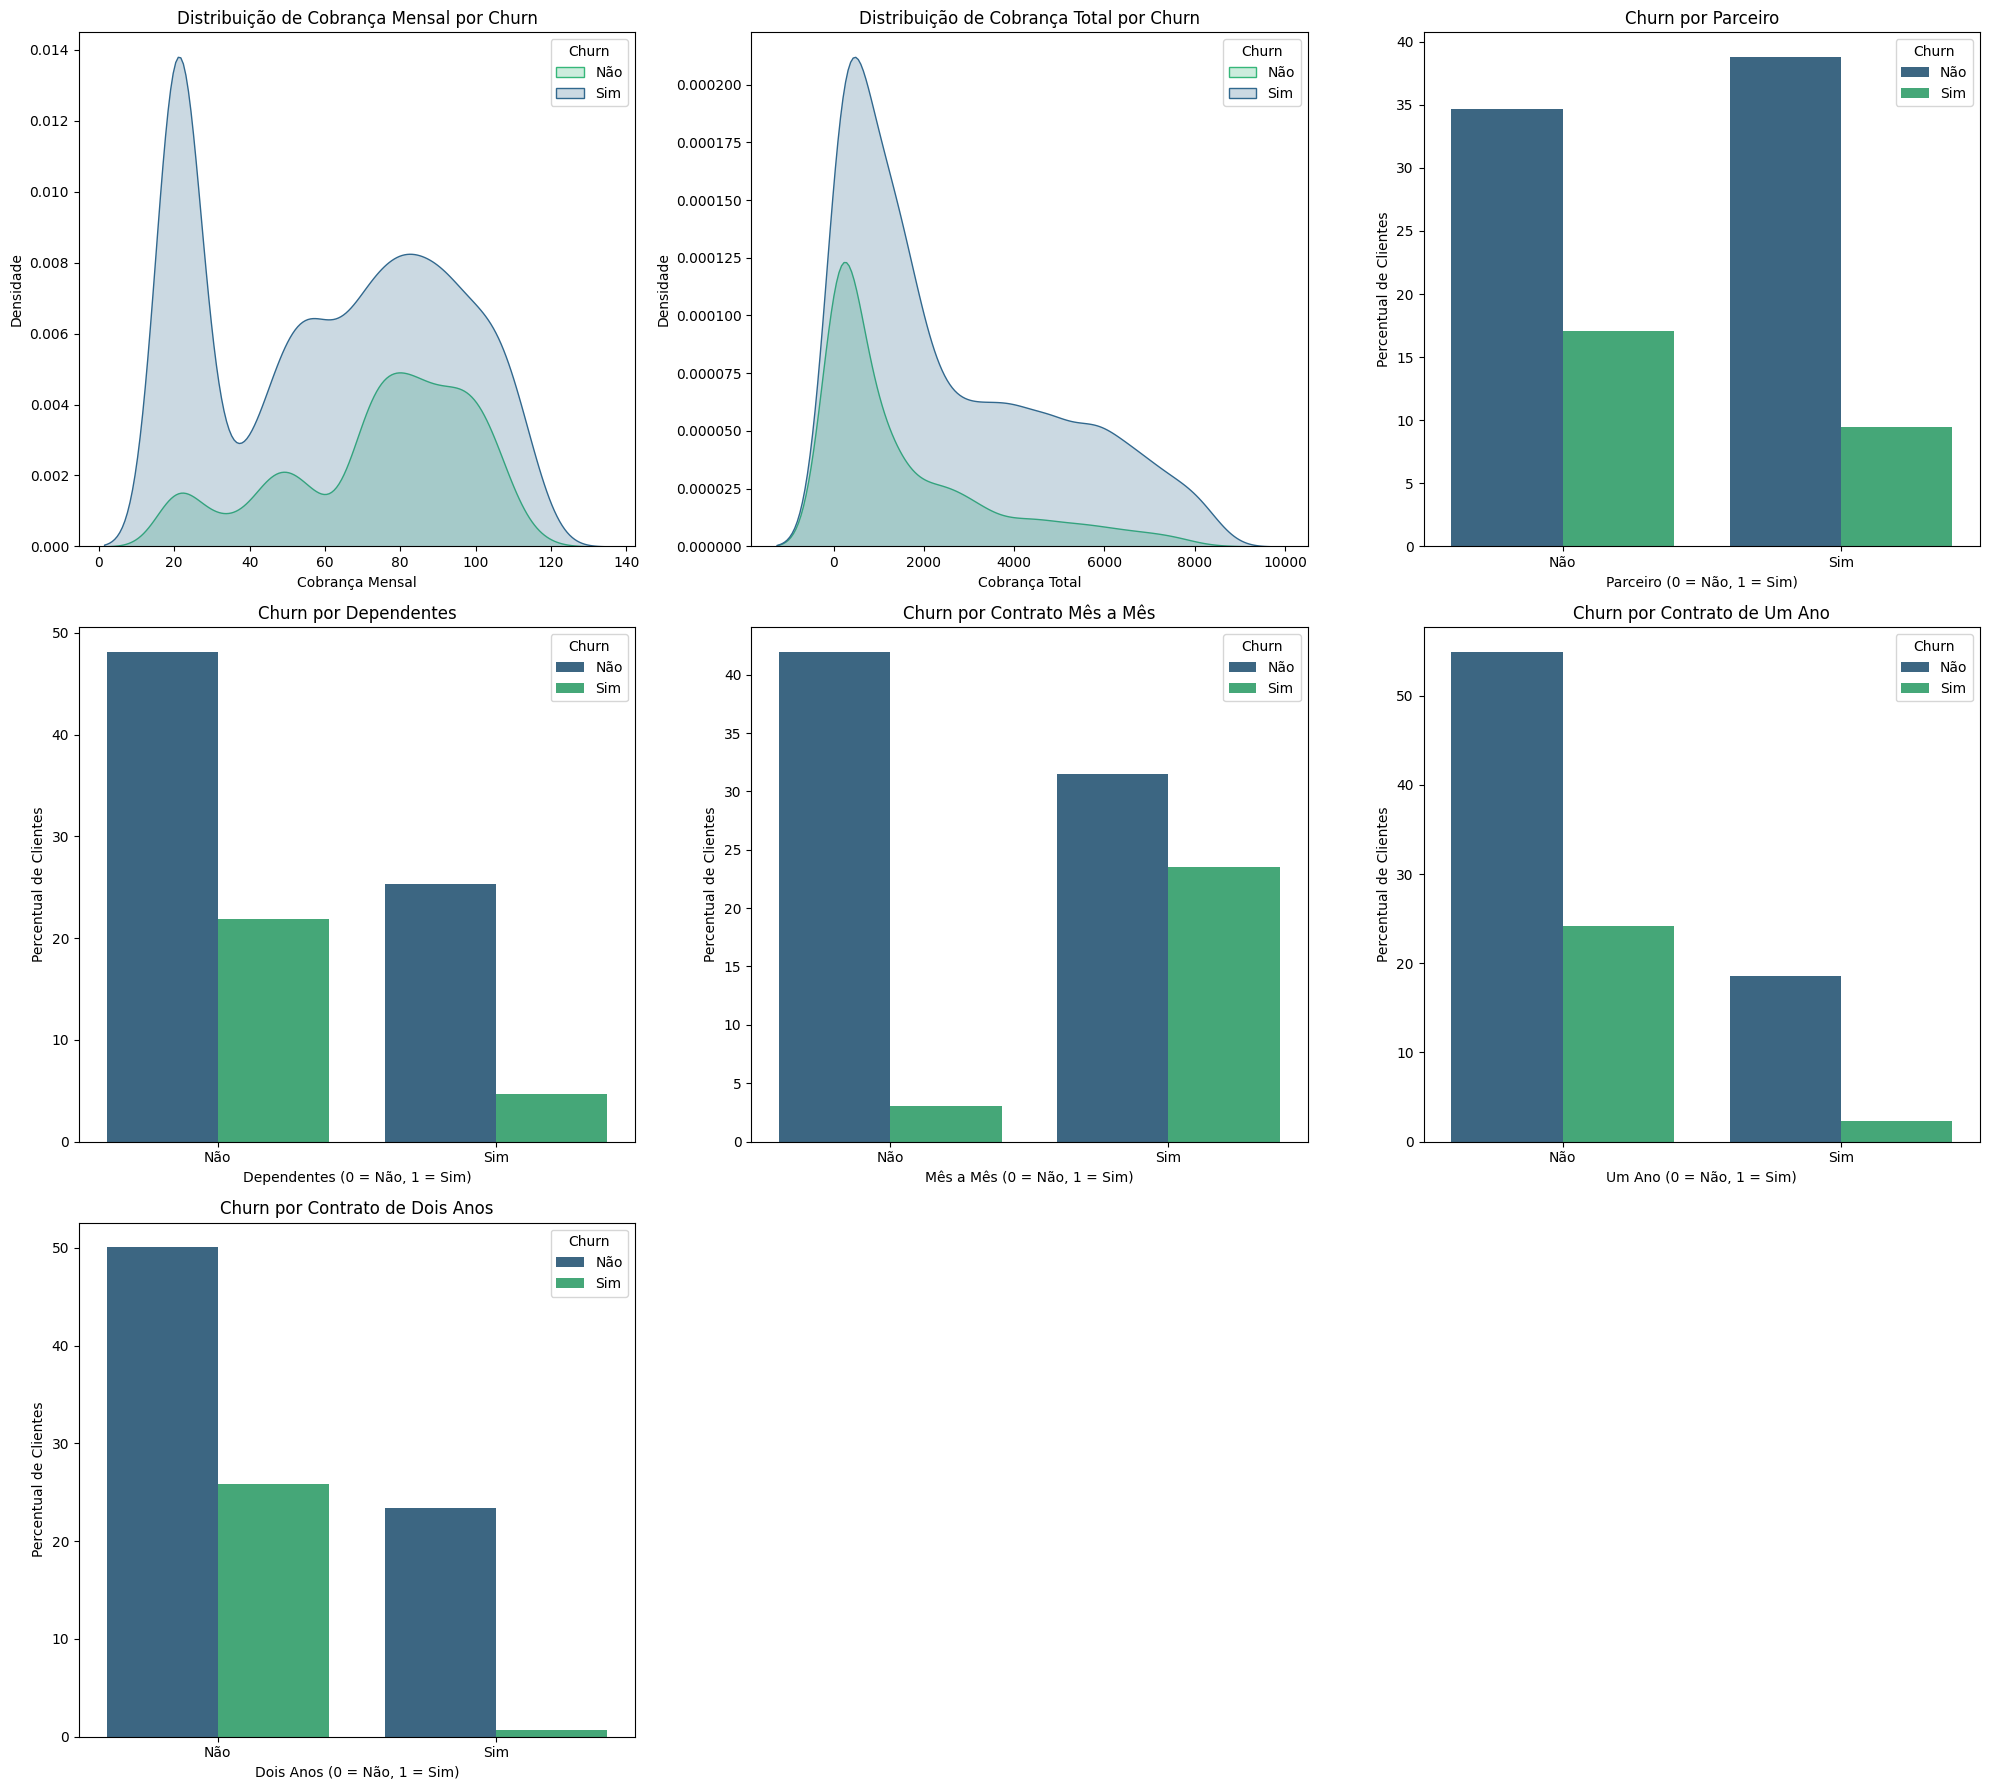

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a figure and subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Flatten the axes array for easier iteration if needed, but direct access is also fine
axes = axes.flatten()

# 2. KDE plot for 'Cobranca_Mensal'
sns.kdeplot(data=dados_normalizados, x='Cobranca_Mensal', hue='Churn', fill=True, palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição de Cobrança Mensal por Churn')
axes[0].set_xlabel('Cobrança Mensal')
axes[0].set_ylabel('Densidade')
axes[0].legend(title='Churn', labels=['Não', 'Sim'])

# 3. KDE plot for 'Cobranca_Total'
sns.kdeplot(data=dados_normalizados, x='Cobranca_Total', hue='Churn', fill=True, palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição de Cobrança Total por Churn')
axes[1].set_xlabel('Cobrança Total')
axes[1].set_ylabel('Densidade')
axes[1].legend(title='Churn', labels=['Não', 'Sim'])

# 4. Countplot for 'Parceiro'
sns.countplot(data=dados_normalizados, x='Parceiro', hue='Churn', palette='viridis', stat='percent', legend=False, ax=axes[2])
axes[2].set_title('Churn por Parceiro')
axes[2].set_xlabel('Parceiro (0 = Não, 1 = Sim)')
axes[2].set_ylabel('Percentual de Clientes')
axes[2].set_xticks(ticks=[0, 1], labels=['Não', 'Sim'])
axes[2].legend(title='Churn', labels=['Não', 'Sim'])

# 5. Countplot for 'Dependentes'
sns.countplot(data=dados_normalizados, x='Dependentes', hue='Churn', palette='viridis', stat='percent', legend=False, ax=axes[3])
axes[3].set_title('Churn por Dependentes')
axes[3].set_xlabel('Dependentes (0 = Não, 1 = Sim)')
axes[3].set_ylabel('Percentual de Clientes')
axes[3].set_xticks(ticks=[0, 1], labels=['Não', 'Sim'])
axes[3].legend(title='Churn', labels=['Não', 'Sim'])

# 6. Countplot for 'Contrato_Month-to-month'
sns.countplot(data=dados_normalizados, x='Contrato_Month-to-month', hue='Churn', palette='viridis', stat='percent', legend=False, ax=axes[4])
axes[4].set_title('Churn por Contrato Mês a Mês')
axes[4].set_xlabel('Mês a Mês (0 = Não, 1 = Sim)')
axes[4].set_ylabel('Percentual de Clientes')
axes[4].set_xticks(ticks=[0, 1], labels=['Não', 'Sim'])
axes[4].legend(title='Churn', labels=['Não', 'Sim'])

# 7. Countplot for 'Contrato_One year'
sns.countplot(data=dados_normalizados, x='Contrato_One year', hue='Churn', palette='viridis', stat='percent', legend=False, ax=axes[5])
axes[5].set_title('Churn por Contrato de Um Ano')
axes[5].set_xlabel('Um Ano (0 = Não, 1 = Sim)')
axes[5].set_ylabel('Percentual de Clientes')
axes[5].set_xticks(ticks=[0, 1], labels=['Não', 'Sim'])
axes[5].legend(title='Churn', labels=['Não', 'Sim'])

# 8. Countplot for 'Contrato_Two year'
sns.countplot(data=dados_normalizados, x='Contrato_Two year', hue='Churn', palette='viridis', stat='percent', legend=False, ax=axes[6])
axes[6].set_title('Churn por Contrato de Dois Anos')
axes[6].set_xlabel('Dois Anos (0 = Não, 1 = Sim)')
axes[6].set_ylabel('Percentual de Clientes')
axes[6].set_xticks(ticks=[0, 1], labels=['Não', 'Sim'])
axes[6].legend(title='Churn', labels=['Não', 'Sim'])

# Turn off unused subplots
axes[7].set_visible(False)
axes[8].set_visible(False)

# 9. Adjust layout and display the figure
plt.tight_layout()
plt.show()

## Gerando Gráfico de Funil para Análise de Churn

Criando um gráfico de funil para visualizar a redução da base de clientes através de estágios de alto risco de churn (contratos mês a mês e pagamento via cheque eletrônico), culminando na proporção de clientes que evadem nesses segmentos.


In [59]:
import plotly.graph_objects as go

# Calculate the number of customers for each stage
total_clientes = len(dados_normalizados)
clientes_mes_a_mes = dados_normalizados[dados_normalizados['Contrato_Month-to-month'] == 1]
num_clientes_mes_a_mes = len(clientes_mes_a_mes)

clientes_cheque_eletronico = dados_normalizados[dados_normalizados['Metodo_Pagamento_Electronic check'] == 1]
num_clientes_cheque_eletronico = len(clientes_cheque_eletronico)

clientes_mes_a_mes_e_cheque_eletronico = dados_normalizados[(dados_normalizados['Contrato_Month-to-month'] == 1) & (dados_normalizados['Metodo_Pagamento_Electronic check'] == 1)]
num_clientes_mes_a_mes_e_cheque_eletronico = len(clientes_mes_a_mes_e_cheque_eletronico)

churn_total = dados_normalizados['Churn'].sum()
churn_mes_a_mes = clientes_mes_a_mes['Churn'].sum()
churn_cheque_eletronico = clientes_cheque_eletronico['Churn'].sum()
churn_mes_a_mes_e_cheque_eletronico = clientes_mes_a_mes_e_cheque_eletronico['Churn'].sum()


# Define the stages and their values for the funnel chart
stages = [
    'Total de Clientes',
    'Clientes com Contrato Mês a Mês',
    'Clientes com Cheque Eletrônico',
    'Clientes Mês a Mês E Cheque Eletrônico',
    'Clientes que Evadiram (total)'
]

values = [
    total_clientes,
    num_clientes_mes_a_mes,
    num_clientes_cheque_eletronico,
    num_clientes_mes_a_mes_e_cheque_eletronico,
    churn_total
]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y = stages,
    x = values,
    textinfo = 'value+percent initial',
    marker = {"color": ["#66c2a5", "#8c564b", "#984ea3", "#e78ac3", "#fc8d62"]},
    connector = {"line": {"color": "gray", "dash": "dot"}}
))

fig.update_layout(title='Funil de Churn - Progressão através de Fatores de Risco',
                  showlegend=False)

fig.show()

print("\nInsights do Gráfico de Funil:")
print("- O funil ilustra a diminuição da base de clientes à medida que fatores de risco de churn são aplicados.")
print("- Começamos com um número total de clientes e observamos como a base se reduz ao focar em clientes com contrato mês a mês e método de pagamento por cheque eletrônico.")
print("- A parte mais estreita do funil, representando os clientes que efetivamente evadiram, mostra a proporção final de perda dentro desses segmentos de alto risco.")
print(f"- A base total de clientes é de {total_clientes}.")
print(f"- {num_clientes_mes_a_mes} clientes têm contrato mês a mês, representando {round((num_clientes_mes_a_mes/total_clientes)*100, 2)}% do total.")
print(f"- {num_clientes_cheque_eletronico} clientes usam cheque eletrônico como método de pagamento, representando {round((num_clientes_cheque_eletronico/total_clientes)*100, 2)}% do total.")
print(f"- {num_clientes_mes_a_mes_e_cheque_eletronico} clientes têm contrato mês a mês E usam cheque eletrônico, representando {round((num_clientes_mes_a_mes_e_cheque_eletronico/total_clientes)*100, 2)}% do total.")
print(f"- No total, {churn_total} clientes evadiram, o que corresponde a {round((churn_total/total_clientes)*100, 2)}% da base inicial.")
print("\nEste funil destaca a importância de focar as estratégias de retenção nesses segmentos de alto risco, especialmente naqueles que combinam características como contrato mês a mês e pagamento por cheque eletrônico, onde a probabilidade de churn é historicamente mais elevada.")



Insights do Gráfico de Funil:
- O funil ilustra a diminuição da base de clientes à medida que fatores de risco de churn são aplicados.
- Começamos com um número total de clientes e observamos como a base se reduz ao focar em clientes com contrato mês a mês e método de pagamento por cheque eletrônico.
- A parte mais estreita do funil, representando os clientes que efetivamente evadiram, mostra a proporção final de perda dentro desses segmentos de alto risco.
- A base total de clientes é de 7043.
- 3875 clientes têm contrato mês a mês, representando 55.02% do total.
- 2365 clientes usam cheque eletrônico como método de pagamento, representando 33.58% do total.
- 1850 clientes têm contrato mês a mês E usam cheque eletrônico, representando 26.27% do total.
- No total, 1869 clientes evadiram, o que corresponde a 26.54% da base inicial.

Este funil destaca a importância de focar as estratégias de retenção nesses segmentos de alto risco, especialmente naqueles que combinam características co

# **Relatório**
**Principais Descobertas da Análise de Dados**

---



**Taxa Geral de Churn:** Aproximadamente 26,54% dos clientes cancelaram seus serviços, indicando um desafio significativo de retenção.

**Fatores Demográficos:** Não há diferença significativa nas taxas de churn entre gêneros. Cidadãos seniores (idosos) mostram uma taxa de churn ligeiramente maior em comparação com não-seniores.

**Parceiros e Dependentes:** Clientes sem parceiros (cerca de 32% de churn) e sem dependentes (cerca de 31% de churn) apresentam taxas de churn substancialmente maiores do que aqueles com parceiros (23% de churn) e dependentes (16% de churn).

**Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato são mais propensos ao churn. O gráfico de Densidade de Kernel (KDE) para 'Meses_Contrato' mostrou uma maior densidade de clientes que cancelaram em valores de tenure mais baixos.

**Serviços de Telefone:** Clientes sem serviço de telefone ou com linha única geralmente apresentam padrões de churn diferentes em comparação com aqueles com múltiplas linhas, mas uma análise mais detalhada pode ser necessária.

**Serviços de Internet e Complementos:** O tipo de serviço de internet (DSL vs. Fibra Óptica vs. Sem serviço de internet) impacta significativamente o churn. Clientes de fibra óptica frequentemente mostram maior churn. Serviços como Segurança Online, Backup Online, Proteção de Dispositivo, Suporte Técnico, Streaming de TV e Streaming de Filmes também desempenham um papel, com clientes que não possuem esses serviços às vezes apresentando taxas de churn mais altas.

**Tipo de Contrato:** Contratos mês a mês estão fortemente associados a taxas de churn mais altas em comparação com contratos de um e dois anos, que tendem a ter um churn menor.

**Preferências de Faturamento:** Clientes que optam por faturamento sem papel (online) podem exibir comportamentos de churn diferentes. (Percentuais específicos não foram detalhados neste resumo, mas foram visualizados).

**Métodos de Pagamento:** O método de pagamento 'Cheque Eletrônico' está associado a uma taxa de churn significativamente maior (aprox. 42,9%) em comparação com outros métodos.

**Cobranças Mensais e Totais:** Existe uma forte correlação positiva entre cobranças mensais mais altas e a taxa de churn. Por outro lado, clientes com cobranças totais muito baixas (sugerindo clientes mais novos) também mostram uma alta taxa de churn, enquanto clientes com cobranças totais mais altas (de longo prazo, com maior gasto) tendem a ter um churn menor.

**Insights ou Próximos Passos**
Programas de Retenção Segmentados: Desenvolver estratégias de retenção específicas para clientes sem parceiros ou dependentes, pois esses grupos estão em maior risco de cancelar.

**Incentivos Contratuais:** Introduzir incentivos para que clientes em contratos mês a mês mudem para planos de longo prazo (um ou dois anos), que possuem taxas de churn mais baixas.

**Análise do Método de Pagamento:** Investigar as razões por trás do alto churn entre clientes que usam cheques eletrônicos. Isso pode envolver pesquisas ou análises qualitativas para entender os pontos problemáticos.

**Engajamento Precoce do Cliente:** Implementar programas de engajamento proativo para novos clientes, especialmente aqueles com altas cobranças mensais, mas baixas cobranças totais, para reduzir o churn inicial.

**Revisão do Pacote de Serviços:** Avaliar o impacto dos tipos de serviço de internet e complementos no churn. Considerar estratégias de agrupamento ou melhoria dos serviços que mostram taxas de churn mais altas.